In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import statistics as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [27]:
url=("D:\\data sciencce\\practical 6&7 lab\\train (1).csv")
titanic=pd.read_csv(url)
titanic.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
#total missing value
num_nan = titanic.isna().sum()
total_nan = num_nan.sum
print("Total NaN values:", total_nan)


Total NaN values: <bound method NDFrame._add_numeric_operations.<locals>.sum of PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64>


In [29]:
#droping Cabin as it has 687 missing value
titanic_ = titanic.drop('Cabin', axis=1)
titanic_.head(20
              )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


#can find relation between pclass and fare
can find relation between gender and survived
relation between passengerid and survive to find no. of death
maybe we can find relation between port and fare 



<AxesSubplot:>

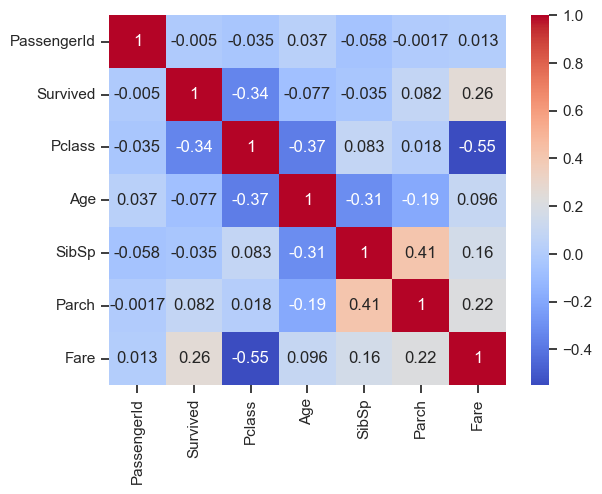

In [30]:

titanic3= titanic_.drop('Name', axis=1)
titanic4= titanic_.drop('PassengerId', axis=1)
corr_matrix = titanic_.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Parch'>

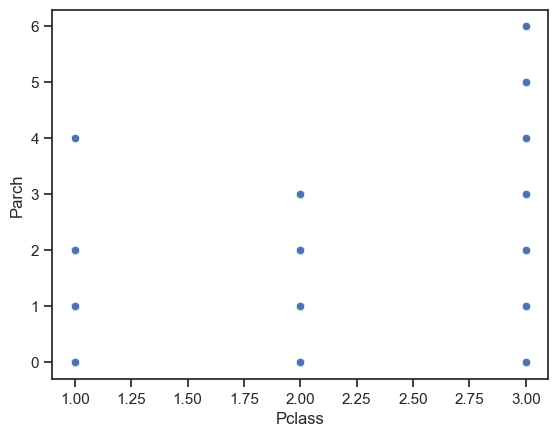

In [31]:
#failed
sns.scatterplot(data=titanic3,x='Pclass', y='Parch')


<AxesSubplot:>

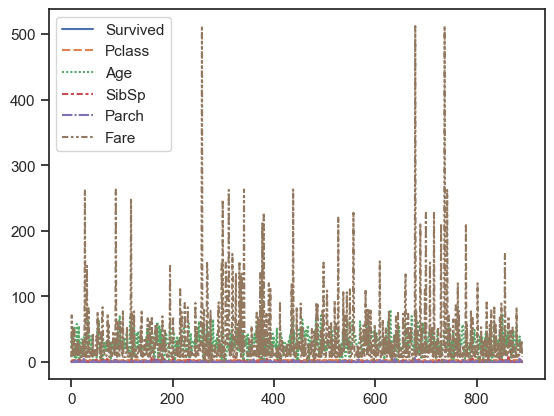

In [32]:
#failed
sns.lineplot(data=titanic4)


<AxesSubplot:>

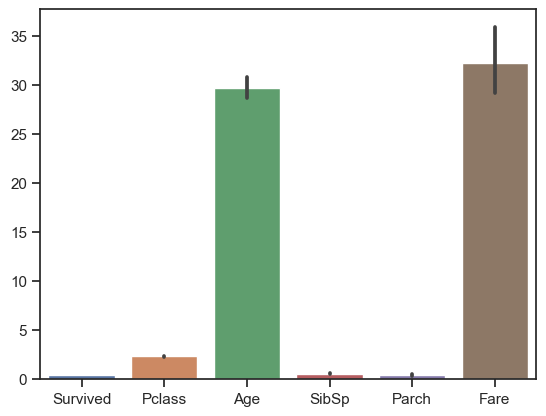

In [33]:
# failed
sns.barplot(data=titanic4)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

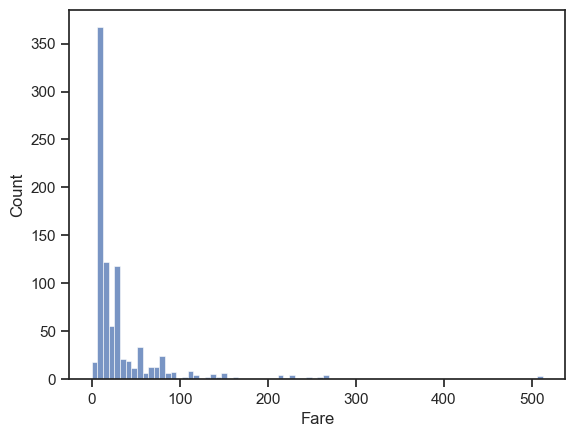

In [34]:
#fare of each passenger is ditributed by plotting   a
#sns.histplot(data=titanic3,x="PassengerId",y="Fare", bins=10)
sns.histplot(data=titanic_, x="Fare",bins=80)


<AxesSubplot:>

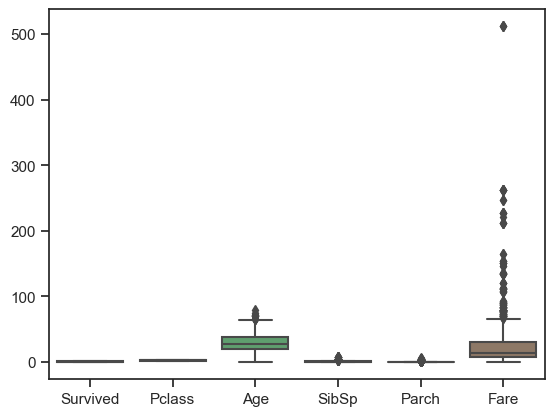

In [35]:
sns.boxplot(data=titanic4)

In [36]:
x=titanic3["Fare"].max()
max_= titanic3['Fare'].max()

print
(
"The maximum fare is:"
, x)

('The maximum fare is:', 512.3292)

<AxesSubplot:>

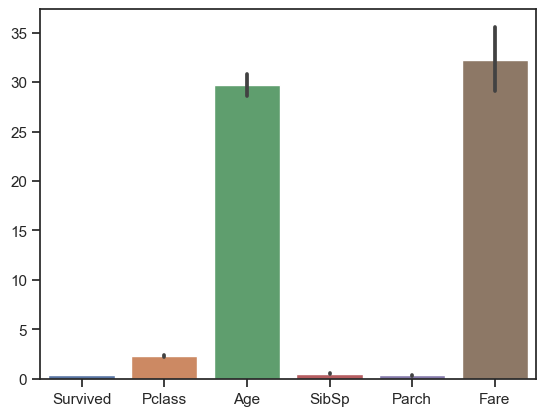

In [37]:
sns.barplot(data=titanic4)

LAB 7

In [38]:
# gender = {'male': 1, 'female': 0}
# for k, v in gender.items():
#     titanic_['Sex'] = titanic_['Sex'].replace([k], v)
    
    
# titanic_.head()
    



In [39]:
gender = {'male': 1, 'female': 0}
titanic4['Sex_binary'] = titanic4['Sex'].copy().replace(gender)


titanic4.head(20)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_binary
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


<AxesSubplot:xlabel='Age', ylabel='Sex_binary'>

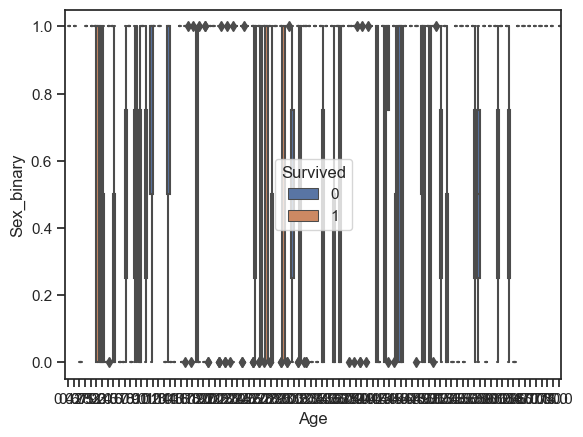

In [40]:
#failed
sns.boxplot(x="Age", y="Sex_binary", hue="Survived", data=titanic4)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

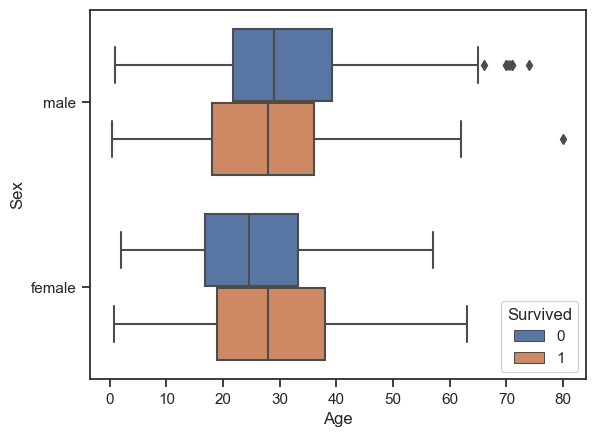

In [41]:
#chatgpt wins
sns.boxplot(x="Age", y="Sex", hue="Survived", data=titanic_)

Observation
1)The median age of female passengers who survived was lower than the median age of male passengers who survived.
2) more outlier in male than female in both case
3)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

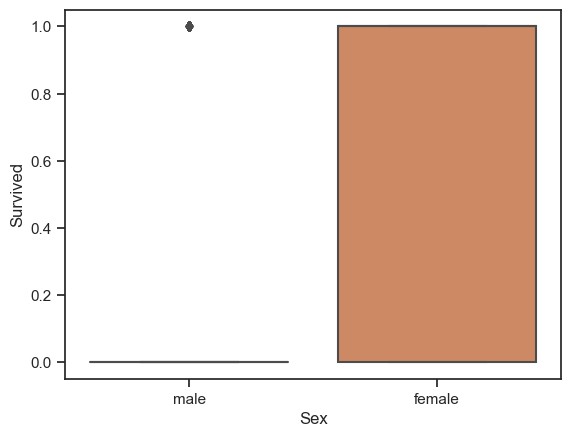

In [42]:
#failed
sns.boxplot(data=titanic4 ,x=titanic4['Sex'],y=titanic4['Survived'])

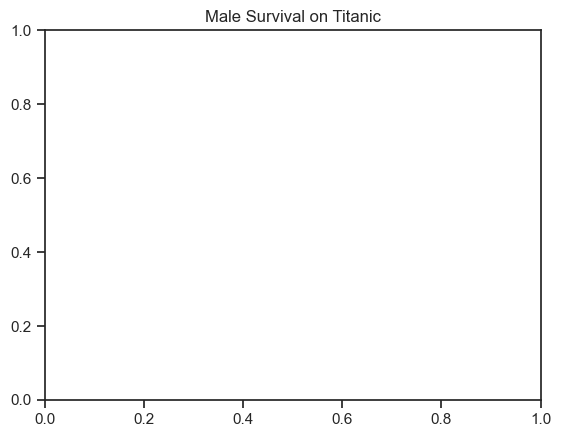

In [43]:
#z=titanic4['Sex']==male
#sns.boxplot(data=titanic4, x='Sex',y='Survived')
male_survived = titanic4[(titanic4['Sex'] == 'male') & (titanic4['Survived'] == 1)]
plt.title('Male Survival on Titanic') 
plt.show()